# Project Bimbingan Karir Data Science

Nama: Putri Laras Purbo Kencono

NIM: A11.2020.12753

# Download Dataset

In [ ]:
import requests
from io import BytesIO
from zipfile import ZipFile

dataset_url = "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
response = requests.get(dataset_url)
zip_file = ZipFile(BytesIO(response.content))
zip_file.extractall('/content')
zip_file.printdir()
zip_file.close()

File Name                                             Modified             Size
Index                                          2023-05-22 22:24:00          644
WARNING                                        2023-05-22 22:24:00          407
ask-detrano                                    2023-05-22 22:24:00          587
bak                                            2023-05-22 22:24:00         6737
cleve.mod                                      2023-05-22 22:24:00        23941
cleveland.data                                 2023-05-22 22:24:00        60669
costs/                                         2023-05-22 22:24:00            0
costs/Index                                    2023-05-22 22:24:00          250
costs/heart-disease.README                     2023-05-22 22:24:00         2558
costs/heart-disease.cost                       2023-05-22 22:24:00          185
costs/heart-disease.delay                      2023-05-22 22:24:00          234
costs/heart-disease.expense             

# 1) Pengumpulan Data

Dalam langkah ini, kita akan mengumpulkan data yang akan digunakan untuk analisis. Data yang diperlukan berasal dari [Hungarian Institute of Cardiology](https://archive.ics.uci.edu/dataset/45/heart+disease). Dataset ini merupakan bagian dari kumpulan data penyakit jantung yang juga mencakup data dari Cleveland Clinic Foundation, V.A. Medical Center di Long Beach, dan University Hospital di Zurich. Kita akan memulai dengan membaca data dari file `hungarian.data` dan mengonversinya ke dalam format DataFrame menggunakan Pandas.


In [ ]:
import pandas as pd
import itertools

# Menetapkan opsi untuk menampilkan 100 kolom
pd.set_option('display.max_columns', 100)
# Menetapkan opsi untuk menampilkan 100 baris
pd.set_option('display.max_rows', 100)

file_path = 'hungarian.data'

with open(file_path, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,0,289,-9,-9,-9,0,-9,-9,0,12,16,84,0,0,0,0,0,150,18,-9,7,172,86,200,110,140,86,0,0,0,-9,26,20,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,12,20,84,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,1,180,-9,-9,-9,0,-9,-9,0,11,16,84,0,0,0,0,0,-9,10,9,7,156,100,220,106,160,90,0,0,1,2,14,13,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,11,20,84,1,-9,-9,2,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,0,283,-9,-9,-9,0,-9,-9,1,11,21,84,0,0,0,0,0,100,10,-9,5,98,58,180,100,130,80,0,0,0,-9,17,14,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,11,26,84,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,0,214,-9,-9,-9,0,-9,-9,0,9,21,84,0,0,0,0,0,50,5,4,4,108,54,210,106,138,86,1,0,1.5,2,19,22,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,9,30,84,3,-9,2,-9,-9,2,-9,-9,-9,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,0,-9,-9,-9,-9,0,-9,-9,0,7,25,84,0,0,1,1,0,25,2,-9,3,122,74,130,100,150,90,0,1,0,-9,13,9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,7,30,84,0,-9,-9,-9,-9,1,-9,-9,-9,1,-9,1,1,1,1,1,-9.,-9.,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053,0,48,0,0,0,0,-9,2,-9,0,308,-9,-9,-9,0,-9,-9,1,3,7,85,0,0,0,0,0,100,11,10,6,-9,-9,-9,-9,-9,-9,-9,-9,2,1,16,13,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,3,16,85,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,0,166,-9,-9,-9,0,-9,-9,0,3,15,85,0,0,0,0,0,150,18,-9,7,180,72,170,110,120,80,0,0,0,-9,13,13,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,3,17,85,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,0,211,-9,-9,-9,0,-9,-9,0,3,26,85,0,0,0,0,0,125,15,-9,-9,138,66,190,82,110,60,0,0,0,-9,10,10,-9,-9,-9,-9,-9,-9,-9,6,1,-9,-9,3,28,85,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,1,257,-9,-9,-9,0,-9,-9,0,3,3,86,0,0,0,0,0,50,6,5.5,4,135,84,150,90,140,90,0,0,1,1,14,13,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,3,6,86,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name


DataFrame `df` di atas berisi data dari Hungarian Institute of Cardiology. Dataset Hungarian ini mengandung 294 baris dengan 76 kolom, namun hanya 14 kolom yang biasanya digunakan dalam eksperimen. Data ini akan menjadi dasar untuk analisis lebih lanjut dalam proyek ini.

# 2) Menelaah Data

Setelah berhasil mengumpulkan data dari Hungarian Institute of Cardiology, langkah penting selanjutnya adalah melakukan penelaahan mendalam terhadap data tersebut. Tujuan dari langkah ini adalah untuk memahami secara detail karakteristik dan struktur data yang kita miliki. Ini termasuk memahami jumlah baris dan kolom, jenis data di setiap kolom, serta melihat preview data untuk mendapatkan gambaran awal.

Penelaahan ini sangat penting karena akan menjadi dasar dalam memutuskan langkah-langkah selanjutnya dalam proses analisis data, termasuk keputusan dalam pembersihan dan pemodelan data. Kita akan memulai dengan melihat beberapa baris awal dari dataset untuk mendapatkan pemahaman awal tentang struktur data. Kemudian, kita akan melakukan pemeriksaan terhadap jenis data di setiap kolom dan jumlah nilai yang hilang, yang akan memberikan wawasan lebih lanjut tentang keadaan dataset yang kita miliki.


In [ ]:
# Menampilkan lima baris pertama dari DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,0,289,-9,-9,-9,0,-9,-9,0,12,16,84,0,0,0,0,0,150,18,-9,7,172,86,200,110,140,86,0,0,0,-9,26,20,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,12,20,84,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,1,180,-9,-9,-9,0,-9,-9,0,11,16,84,0,0,0,0,0,-9,10,9,7,156,100,220,106,160,90,0,0,1,2,14,13,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,11,20,84,1,-9,-9,2,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,0,283,-9,-9,-9,0,-9,-9,1,11,21,84,0,0,0,0,0,100,10,-9,5,98,58,180,100,130,80,0,0,0,-9,17,14,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,11,26,84,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,0,214,-9,-9,-9,0,-9,-9,0,9,21,84,0,0,0,0,0,50,5,4,4,108,54,210,106,138,86,1,0,1.5,2,19,22,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,9,30,84,3,-9,2,-9,-9,2,-9,-9,-9,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,0,-9,-9,-9,-9,0,-9,-9,0,7,25,84,0,0,1,1,0,25,2,-9,3,122,74,130,100,150,90,0,1,0,-9,13,9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,7,30,84,0,-9,-9,-9,-9,1,-9,-9,-9,1,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
# Menampilkan informasi dasar tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Dari output di atas, kita dapat melihat struktur awal dari dataset. Dataset ini terdiri dari berbagai kolom yang merepresentasikan data pasien, termasuk usia, jenis kelamin, jenis nyeri dada, tekanan darah saat istirahat, kolesterol, dan lain-lain. Saat ini, setiap kolom diwakili dengan nomor kolom, dan kita perlu melakukan pemetaan nama kolom yang lebih deskriptif untuk kemudahan analisis.

Kita juga dapat melihat bahwa beberapa kolom memiliki tipe data yang belum ditentukan dengan benar dan beberapa kolom memiliki banyak nilai yang hilang, yang ditandai dengan `-9`. Ini menunjukkan kebutuhan untuk pembersihan data yang cermat, termasuk penanganan nilai yang hilang dan konversi tipe data.

# 3) Validasi Data

Setelah menelaah data, langkah penting berikutnya dalam proses analisis data adalah validasi data. Validasi data adalah proses yang sangat penting untuk memastikan kualitas dan keakuratan data yang akan kita gunakan. Proses ini melibatkan beberapa aspek krusial, seperti verifikasi tipe data di setiap kolom.

Pertama, kita akan memeriksa tipe data untuk setiap kolom. Tipe data yang benar penting untuk analisis yang akurat, terutama jika kita ingin melakukan perhitungan statistik atau pemodelan data. Misalnya, kita tidak ingin kolom yang seharusnya numerik tertulis sebagai string atau objek.

Kedua, kita akan mengidentifikasi dan menghitung persentase nilai yang hilang dalam setiap kolom. Nilai yang hilang bisa berdampak besar pada analisis dan model pembelajaran mesin. Terutama dalam kasus ini, dimana nilai yang hilang ditandai dengan `-9` dan perlu diubah menjadi NaN untuk identifikasi yang tepat.

Langkah validasi ini akan memberikan kita pemahaman yang lebih baik tentang keadaan data kita dan apa yang perlu dilakukan dalam proses pembersihan data berikutnya.


In [ ]:
# Menampilkan tipe data untuk setiap kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)


Tipe Data Setiap Kolom:
0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
41    object
42    object
43    object
44    object
45    object
46    object
47    object
48    object
49    object
50    object
51    object
52    object
53    object
54    object
55    object
56    object
57    object
58    object
59    object
60    object
61    object
62    object
63    object
64    object
65    object
66    object
67    object
68    object
69    object
70    object
71    object
72    object
73    object
74    object


In [ ]:
# Calculating the percentage of missing values in each column
# Replacing '-9' with NaN to identify missing values properly
df.replace('-9', pd.NA, inplace=True)
missing_values_percentage = df.isna().mean() * 100

# Menghitung persentase nilai yang hilang per kolom
print("Persentase Nilai yang Hilang Per Kolom:")
print(missing_values_percentage)

Persentase Nilai yang Hilang Per Kolom:
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7     100.000000
8       0.000000
9       0.340136
10      0.340136
11      7.823129
12     95.918367
13     99.659864
14    100.000000
15      2.721088
16     92.857143
17     99.659864
18      0.340136
19      0.000000
20      0.000000
21      0.000000
22      0.340136
23      0.680272
24      0.340136
25      0.340136
26      0.340136
27      3.061224
28      0.680272
29     64.625850
30      0.680272
31      0.340136
32      0.340136
33      0.340136
34      0.340136
35      0.340136
36      0.340136
37      0.340136
38      0.680272
39      0.000000
40     64.625850
41      0.340136
42      0.000000
43     98.639456
44    100.000000
45    100.000000
46    100.000000
47     98.979592
48    100.000000
49     99.319728
50     90.476190
51     90.816327
52     94.217687
53    100.000000
54      0.000000
55      0.000000
56      

Dengan menjalankan kode di atas, kita telah mendapatkan persentase nilai yang hilang untuk setiap kolom dalami.  dataset. Hal ini memberikan kita wawasan tentang kolom mana yang mungkin memerlukan perhatian lebih dalam proses pembersihan data, seperti kolom dengan persentase nilai hilang yang tinggSelain itu, kita juga telah memverifikasi tipe data untuk setiap kolom.


# 4) Menetapkan Objek Data

Setelah validasi data, langkah selanjutnya dalam proses analisis data adalah menetapkan objek data. Langkah ini melibatkan pemilihan kolom yang relevan berdasarkan informasi yang disediakan tentang dataset dan penyesuaian tipe data setiap kolom sesuai dengan karakteristiknya. Tujuan dari langkah ini adalah untuk memastikan bahwa data yang kita analisis sudah disesuaikan dengan kebutuhan analisis dan mudah diinterpretasikan.

Berdasarkan informasi yang diberikan, dataset Hungarian Institute of Cardiology yang kita gunakan merupakan bagian dari kumpulan data yang lebih besar yang mencakup berbagai institusi. Dataset ini memiliki 76 atribut mentah, tetapi hanya 14 di antaranya yang sering digunakan dalam penelitian terkait penyakit jantung. Oleh karena itu, kita akan memfokuskan analisis kita pada 14 atribut ini.

Proses ini akan melibatkan pemetaan kolom dataset ke nama yang lebih deskriptif berdasarkan informasi yang diberikan. Kita juga akan mengkonversi tipe data kolom-kolom ini ke format yang lebih sesuai, seperti mengubah tipe data numerik dan kategorikal yang saat ini mungkin masih dalam format string atau objek. Langkah ini penting untuk memastikan bahwa analisis selanjutnya dapat dilakukan dengan tepat dan efisien.


In [ ]:
# Mapping the relevant columns to their respective names as per the Variables Table
column_mapping = {
    2: 'age',        # Age
    3: 'sex',        # Sex
    8: 'cp',         # Chest pain type
    9: 'trestbps',   # Resting blood pressure
    11: 'chol',      # Serum cholestoral
    15: 'fbs',       # Fasting blood sugar
    18: 'restecg',   # Resting electrocardiographic results
    31: 'thalach',   # Maximum heart rate achieved
    38: 'exang',     # Exercise induced angina
    39: 'oldpeak',   # ST depression induced by exercise relative to rest
    40: 'slope',     # Slope of the peak exercise ST segment
    43: 'ca',        # Number of major vessels colored by flourosopy
    50: 'thal',      # Thalassemia
    57: 'num'        # Diagnosis of heart disease
}

# Creating a new dataframe with only the relevant columns
selected_columns = list(column_mapping.keys())
relevant_df = df[selected_columns].copy()

# Renaming the columns
relevant_df.rename(columns=column_mapping, inplace=True)

# Displaying the first few rows of the cleaned dataframe
relevant_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0,<NA>,<NA>,<NA>,0
1,49,0,3,160,180,0,0,156,0,1,2,<NA>,<NA>,1
2,37,1,2,130,283,0,1,98,0,0,<NA>,<NA>,<NA>,0
3,48,0,4,138,214,0,0,108,0,1.5,2,<NA>,<NA>,3
4,54,1,3,150,<NA>,0,0,122,1,0,<NA>,<NA>,<NA>,0


In [ ]:
# Adjusting data types according to the Variables Table
data_types = {
    'age': 'int64',
    'sex': 'category',
    'cp': 'category',
    'trestbps': 'int64',
    'chol': 'int64',
    'fbs': 'category',
    'restecg': 'category',
    'thalach': 'int64',
    'exang': 'category',
    'oldpeak': 'float64',
    'slope': 'category',
    'ca': 'int64',
    'thal': 'category',
    'num': 'int64'
}

# Converting columns to their respective types
for column, dtype in data_types.items():
    if dtype == 'category':
        relevant_df[column] = relevant_df[column].astype('category')
    else:
        relevant_df[column] = pd.to_numeric(relevant_df[column], errors='coerce')

# Menampilkan tipe data untuk setiap kolom yang disesuaikan
print("\nTipe Data Setelah Penyesuaian:")
print(relevant_df.dtypes)


Tipe Data Setelah Penyesuaian:
age            int64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca           float64
thal        category
num            int64
dtype: object


Setelah melakukan revisi pada proses konversi tipe data, kita telah berhasil mengatur tipe data untuk setiap kolom yang tersedia dalam DataFrame kita sesuai dengan karakteristiknya yang didefinisikan dalam tabel variabel.

Berikut adalah perubahan yang telah dilakukan:
1. **Konversi ke Tipe Numerik**: Untuk kolom seperti 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', dan 'num', kita telah mengubah tipe data menjadi numerik (int64 atau float64). Konversi ini memastikan bahwa operasi numerik dan analisis statistik yang akan dilakukan nantinya akan berjalan dengan benar.
2. **Konversi ke Tipe Kategorikal**: Kolom seperti 'sex', 'cp', 'fbs', 'restecg', dan 'exang' telah diubah ke tipe data kategorikal. Hal ini penting untuk analisis yang melibatkan kategori atau pengelompokan data berdasarkan atribut-atribut ini.

Dengan langkah ini, kita telah memastikan bahwa data kita sekarang memiliki struktur yang lebih konsisten dan sesuai dengan kebutuhan analisis. Kita sekarang siap untuk melanjutkan ke langkah pembersihan data lebih lanjut, termasuk penanganan nilai yang hilang dan pengaturan akhir sebelum analisis.

# 5) Pembersihan Data

Setelah berhasil menetapkan objek data dengan tipe data yang sesuai, kita kembali ke langkah pembersihan data. Langkah ini krusial untuk memastikan integritas dan keakuratan data yang akan digunakan dalam analisis lebih lanjut. Proses pembersihan ini meliputi penanganan nilai yang hilang, konfirmasi tipe data, dan pemeriksaan terhadap duplikasi data. Berikut adalah Persentase nilai yang hilang pada tiap kolom:


In [ ]:
missing_values_percentage = relevant_df.isna().mean() * 100

# Menghitung persentase nilai yang hilang per kolom
print("Persentase Nilai yang Hilang Per Kolom:")
print(missing_values_percentage)

Persentase Nilai yang Hilang Per Kolom:
age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.340136
chol         7.823129
fbs          2.721088
restecg      0.340136
thalach      0.340136
exang        0.680272
oldpeak      0.000000
slope       64.625850
ca          98.639456
thal        90.476190
num          0.000000
dtype: float64


Kita telah mengidentifikasi bahwa beberapa kolom dalam dataset memiliki nilai yang hilang. Strategi kita dalam mengatasi nilai yang hilang ini tergantung pada tipe data kolom tersebut:
1. **Untuk Kolom Numerik**: Kita akan mengimputasi nilai yang hilang dengan median kolom tersebut. Penggunaan median membantu mengurangi dampak outlier dalam distribusi data.
2. **Untuk Kolom Kategorikal**: Kita akan mengimputasi nilai yang hilang dengan modus (nilai yang paling sering muncul) dari kolom tersebut. Ini merupakan pendekatan umum dalam menangani nilai hilang untuk data kategorikal.


Langkah pembersihan ini akan memastikan bahwa dataset kita bersih, konsisten, dan siap untuk tahap analisis data selanjutnya.

In [ ]:
# Menghapus kolom dengan persentase nilai yang hilang tinggi
threshold = 50  # Misal, batas threshold adalah 50%
columns_to_drop = relevant_df.columns[relevant_df.isna().mean() > threshold / 100]
relevant_df.drop(columns=columns_to_drop, inplace=True)

# Imputasi nilai yang hilang
for column in relevant_df.columns:
    if relevant_df[column].dtype.name == 'category' or relevant_df[column].dtype.name == 'object':
        # Imputasi dengan modus untuk data kategorikal
        relevant_df[column].fillna(relevant_df[column].mode()[0], inplace=True)
    else:
        # Imputasi dengan median untuk data numerik
        relevant_df[column].fillna(relevant_df[column].median(), inplace=True)

# Mengkonversi tipe data sesuai dengan karakteristik data
# Mengubah kolom numerik menjadi tipe data numerik
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']
relevant_df[numerical_columns] = relevant_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Menghilangkan baris data duplikat
relevant_df.drop_duplicates(inplace=True)

# Menampilkan informasi data setelah pembersihan
print("Informasi Presentase Data NaN Setelah Pembersihan:")
relevant_df.isna().mean() * 100

Informasi Presentase Data NaN Setelah Pembersihan:


age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
num         0.0
dtype: float64

Dengan menjalankan kode di atas, kita telah berhasil melaksanakan langkah-langkah penting dalam pembersihan data. Setiap kolom dalam dataset kini telah ditangani untuk nilai yang hilang dengan cara yang paling sesuai berdasarkan tipe datanya: imputasi median untuk data numerik dan imputasi modus untuk data kategorikal.

Selanjutnya, kita telah memastikan bahwa tidak ada baris data yang terduplikasi dalam dataset. Hal ini penting untuk menghindari bias atau distorsi dalam analisis yang akan kita lakukan.

In [ ]:
# Menampilkan ringkasan data setelah pembersihan
print("Ringkasan Data Setelah Pembersihan:")
relevant_df.describe(include='all')

Ringkasan Data Setelah Pembersihan:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,293.000000,293,293,293.000000,293.000000,293,293,293.000000,293,293.000000,293.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,NaN
top,NaN,1,4,NaN,NaN,0,0,NaN,0,NaN,NaN
freq,NaN,213,123,NaN,NaN,273,235,NaN,292,NaN,NaN
mean,47.822526,NaN,NaN,132.651877,250.259386,NaN,NaN,139.061433,NaN,0.588055,0.795222
std,7.824875,NaN,NaN,17.577470,65.092039,NaN,NaN,23.558067,NaN,0.909554,1.238251
min,28.000000,NaN,NaN,92.000000,85.000000,NaN,NaN,82.000000,NaN,0.000000,0.000000
25%,42.000000,NaN,NaN,120.000000,211.000000,NaN,NaN,122.000000,NaN,0.000000,0.000000
50%,49.000000,NaN,NaN,130.000000,243.000000,NaN,NaN,140.000000,NaN,0.000000,0.000000
75%,54.000000,NaN,NaN,140.000000,277.000000,NaN,NaN,155.000000,NaN,1.000000,1.000000


Ringkasan data yang ditampilkan memberikan gambaran umum tentang dataset setelah proses pembersihan. Ini termasuk informasi tentang jumlah entri, nilai rata-rata, standar deviasi, nilai minimum, dan maksimum, serta frekuensi untuk data kategorikal. Dengan dataset yang kini lebih bersih dan terstruktur, kita dapat melanjutkan dengan keyakinan ke tahap analisis data berikutnya.


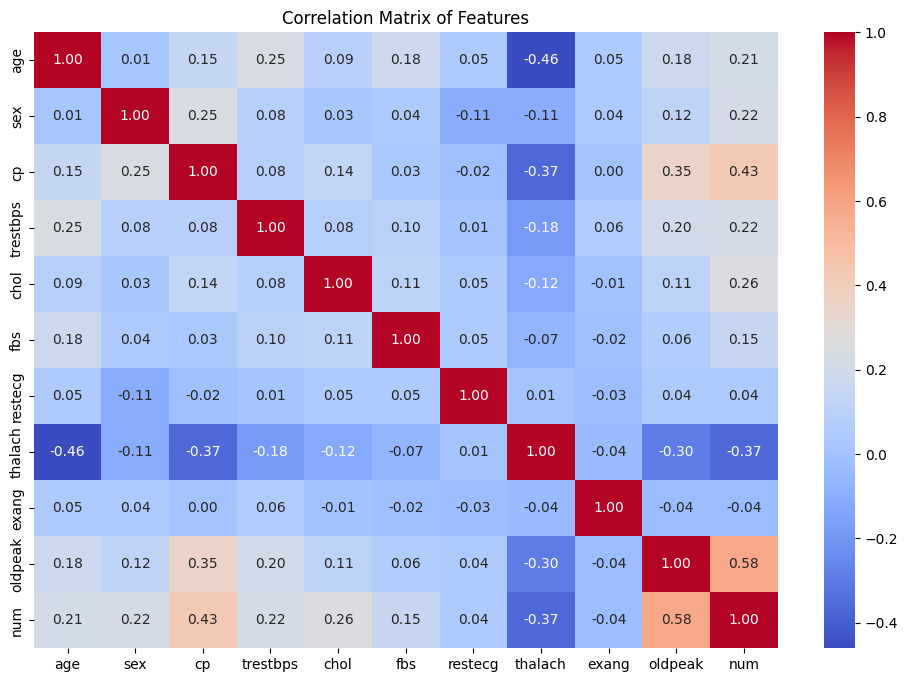

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Menduplikasi dataframe untuk analisis korelasi
df_corr = relevant_df.copy()

# Menghitung matriks korelasi
correlation_matrix = df_corr.corr(numeric_only=False)

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

Matriks korelasi telah dibuat untuk mengevaluasi hubungan antar fitur di dalam dataset. Korelasi diukur dalam rentang -1 hingga +1. Nilai mendekati +1 menunjukkan korelasi positif yang kuat, nilai mendekati -1 menunjukkan korelasi negatif yang kuat, dan nilai mendekati 0 menunjukkan tidak adanya korelasi yang signifikan.

Dari heatmap di atas, kita dapat melihat bagaimana setiap fitur berkorelasi dengan fitur lainnya. Fitur-fitur yang memiliki korelasi tinggi bisa menjadi pertimbangan dalam pemilihan fitur untuk pemodelan, karena fitur yang berkorelasi tinggi mungkin membawa informasi yang redundan.

# 6) Konstruksi Data

Sebelum melanjutkan, penting untuk memastikan bahwa semua kolom dalam dataset memiliki tipe data yang sesuai. Tipe data yang benar memastikan bahwa operasi selanjutnya pada data tersebut dilakukan dengan cara yang tepat.

In [ ]:
# Menampilkan tipe data untuk setiap kolom
print(relevant_df.dtypes)

age            int64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
num            int64
dtype: object


In [ ]:
relevant_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
36,65,1,4,140.0,306.0,1,0,87.0,0,1.5,1
89,55,1,4,140.0,229.0,0,0,110.0,0,0.5,0
169,58,1,4,135.0,222.0,0,0,100.0,0,0.0,0
285,42,1,4,140.0,358.0,0,0,170.0,0,0.0,0
83,52,1,2,160.0,196.0,0,0,165.0,0,0.0,0


Terlihat pada hasil di atas, tipe data sudah sesuai dan semua nilai adalah numerik/angka. Selanjutnya adalah melihat distribusi target.

Distribusi target sangat penting untuk dipahami dalam setiap masalah klasifikasi. Distribusi yang tidak seimbang dapat mempengaruhi performa model, karena model mungkin cenderung memprediksi kelas yang lebih dominan.

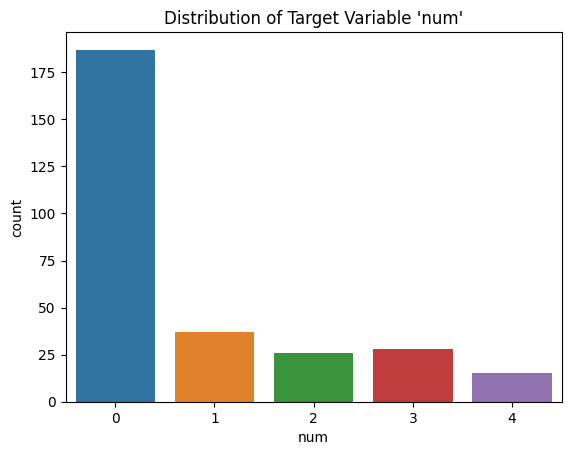

In [ ]:
# Visualisasi distribusi target
sns.countplot(x='num', data=relevant_df)
plt.title("Distribution of Target Variable 'num'")
plt.show()

Dari grafik distribusi target 'num', kita melihat bahwa distribusi kelas target tidak seimbang. Kelas dengan nilai '0' (tidak ada penyakit jantung) lebih dominan daripada kelas lainnya. Ini mengindikasikan bahwa mungkin perlu dilakukan penanganan khusus, seperti oversampling, untuk menghindari bias dalam pemodelan.

Selanjutnya adalah melihat statistik deskriptif data. Statistik deskriptif memberikan gambaran umum tentang data, termasuk rata-rata, median, dan standar deviasi. Normalisasi atau standarisasi dapat diperlukan jika ada perbedaan signifikan dalam skala antar fitur.

In [ ]:
# Menampilkan statistik deskriptif
relevant_df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,293.000000,293,293,293.000000,293.000000,293,293,293.000000,293,293.000000,293.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,NaN
top,NaN,1,4,NaN,NaN,0,0,NaN,0,NaN,NaN
freq,NaN,213,123,NaN,NaN,273,235,NaN,292,NaN,NaN
mean,47.822526,NaN,NaN,132.651877,250.259386,NaN,NaN,139.061433,NaN,0.588055,0.795222
std,7.824875,NaN,NaN,17.577470,65.092039,NaN,NaN,23.558067,NaN,0.909554,1.238251
min,28.000000,NaN,NaN,92.000000,85.000000,NaN,NaN,82.000000,NaN,0.000000,0.000000
25%,42.000000,NaN,NaN,120.000000,211.000000,NaN,NaN,122.000000,NaN,0.000000,0.000000
50%,49.000000,NaN,NaN,130.000000,243.000000,NaN,NaN,140.000000,NaN,0.000000,0.000000
75%,54.000000,NaN,NaN,140.000000,277.000000,NaN,NaN,155.000000,NaN,1.000000,1.000000


Statistik deskriptif menunjukkan variasi dalam skala dan distribusi antar fitur. Beberapa fitur memiliki rentang nilai yang luas dan standar deviasi yang besar, seperti chol (kolesterol serum) dan thalach (detak jantung maksimal). Ini menunjukkan bahwa normalisasi atau standarisasi mungkin diperlukan untuk menyamakan skala antar fitur, terutama jika kita akan menggunakan model yang sensitif terhadap skala, seperti SVM atau k-NN.

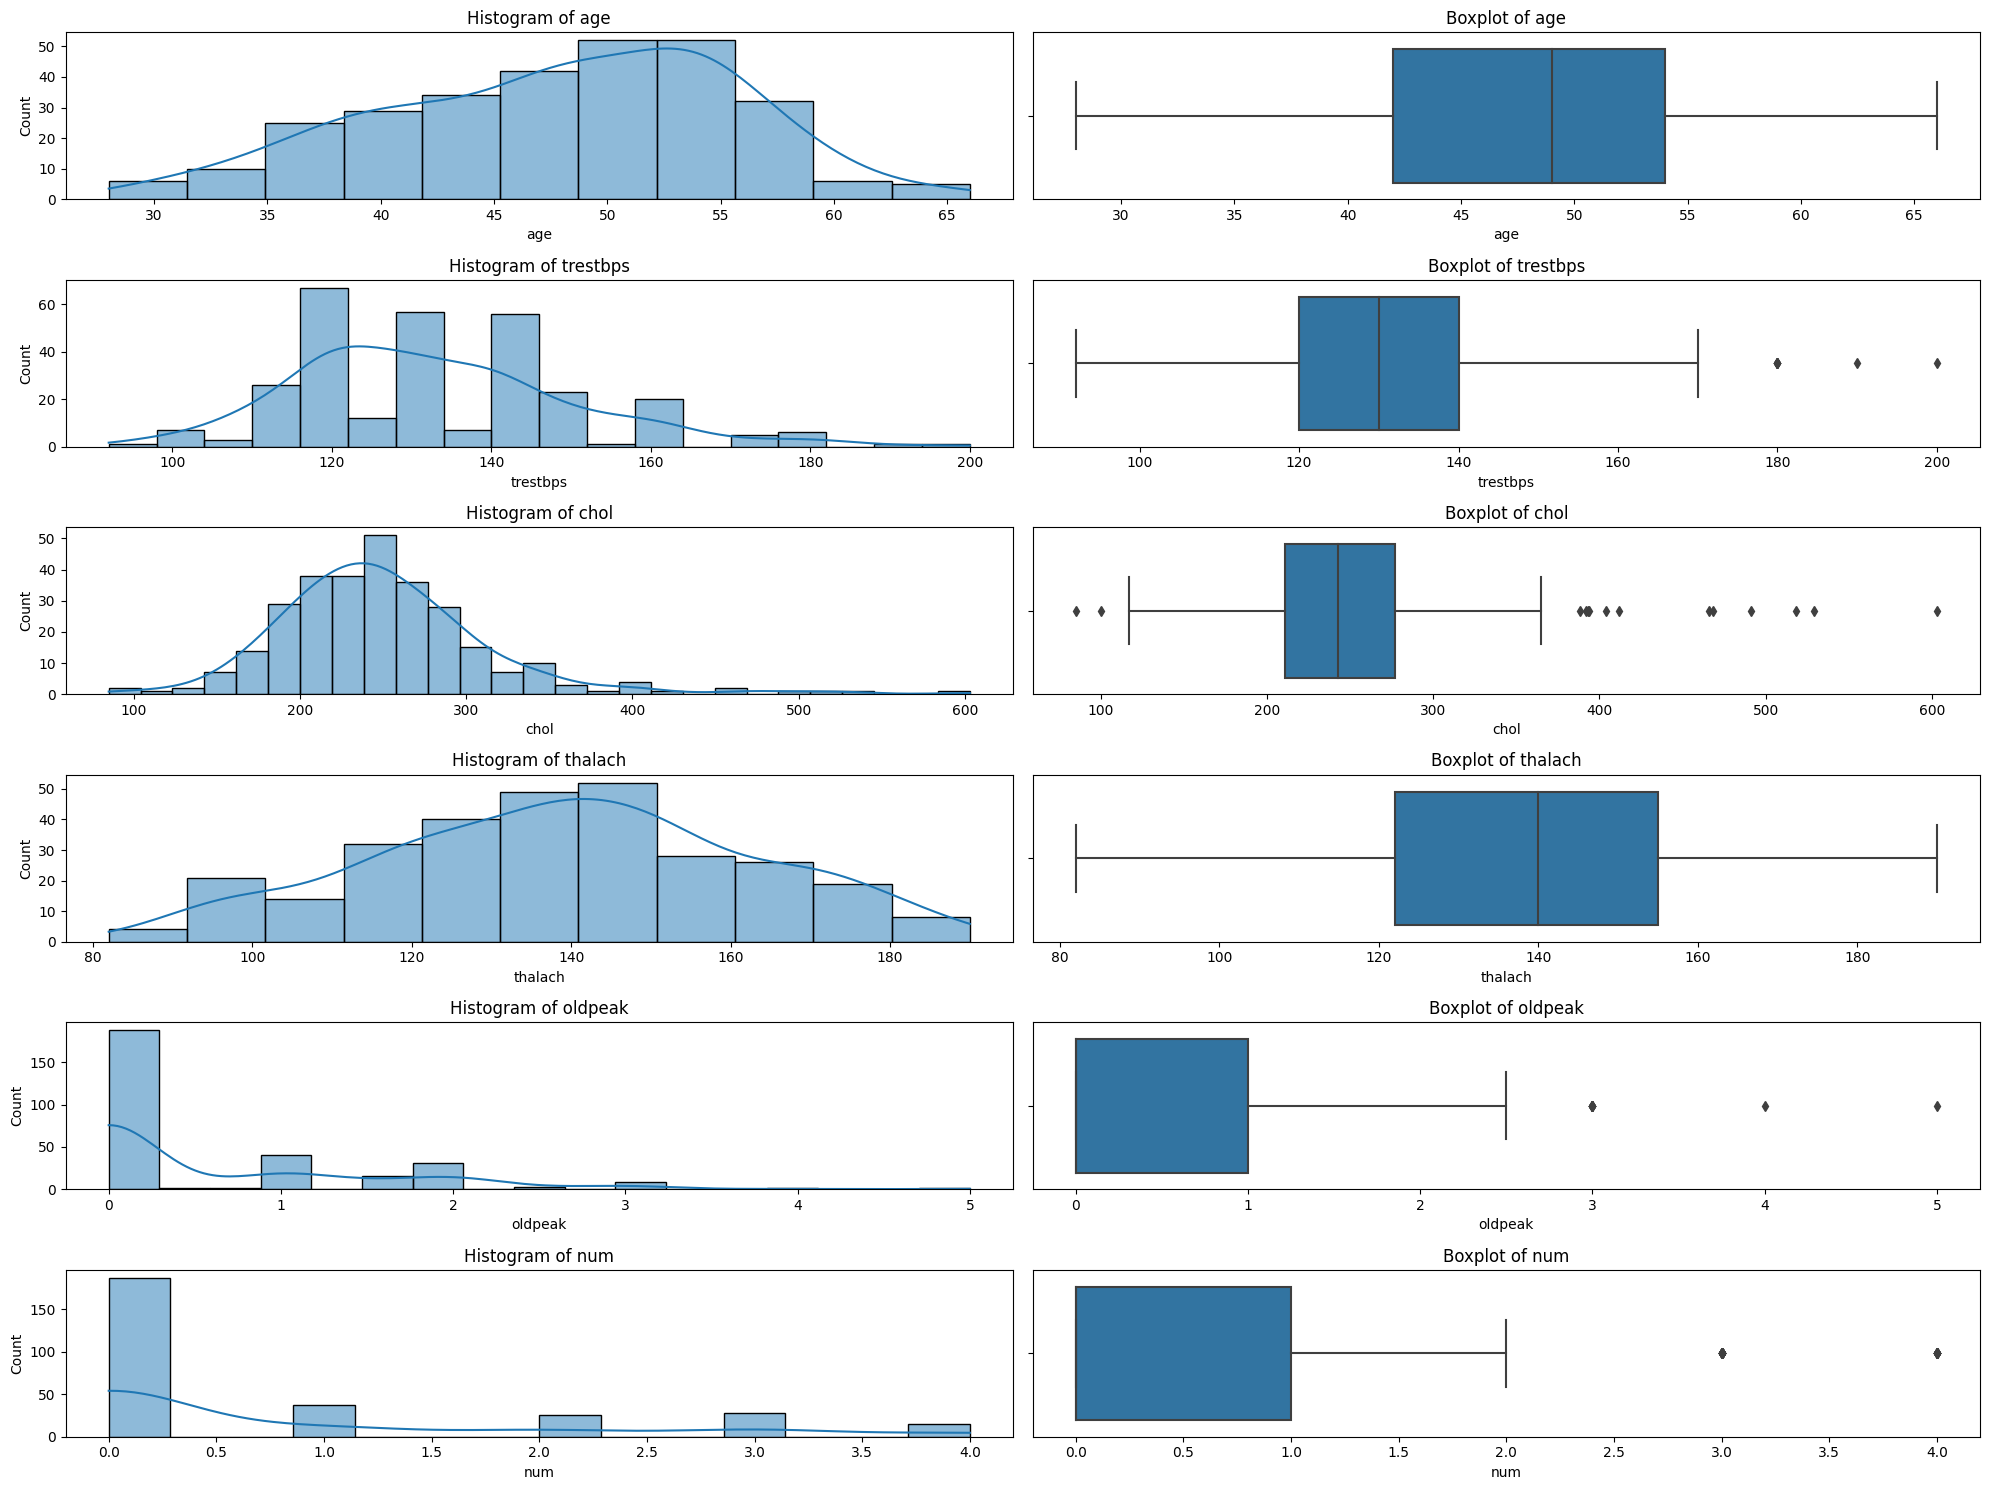

In [ ]:
# Mengecek distribusi dari setiap fitur numerik menggunakan histogram dan boxplot
num_features = relevant_df.select_dtypes(include=['int64', 'float64']).columns

# Mengatur ukuran plot
plt.figure(figsize=(20, 15))

for i, col in enumerate(num_features):
    # Menggambar histogram
    plt.subplot(len(num_features), 2, 2*i+1)
    sns.histplot(relevant_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Menggambar boxplot
    plt.subplot(len(num_features), 2, 2*i+2)
    sns.boxplot(x=relevant_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Berdasarkan histogram dan boxplot untuk setiap fitur numerik, kita dapat membuat beberapa observasi:

- Age (age):Distribusinya cenderung normal dengan sedikit skewness.
Tidak ada outliers yang signifikan.

- Resting Blood Pressure (trestbps): Distribusi cenderung normal dengan sedikit skewness ke kanan.
Terdapat beberapa outliers.

- Serum Cholestoral (chol):Distribusi memiliki skewness ke kanan.
Terdapat beberapa nilai yang sangat tinggi, menunjukkan outliers.

- Maximum Heart Rate Achieved (thalach): Distribusi cenderung normal. Ada beberapa outliers di sisi bawah.

- ST Depression (oldpeak): Distribusi memiliki skewness ke kanan yang signifikan. Banyak outliers di sisi atas.


Berdasarkan analisis distribusi, langkah preprocessing yang disarankan adalah Normalisasi atau Standarisasi. Kebanyakan fitur menunjukkan distribusi yang cenderung normal tetapi dengan beberapa skewness dan outliers. Standarisasi umumnya lebih cocok dalam kasus ini, terutama karena kita juga memiliki outliers.

# 7) Modelling

Setelah preprocessing, kita beralih ke tahap pemodelan. Tahap ini melibatkan pembuatan dan pelatihan model machine learning, diikuti oleh evaluasi performanya.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Pisahkan fitur dan label
X = relevant_df.drop('num', axis=1)
y = relevant_df['num']

## Skenario 1: Standarisasi

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### KNN

Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.36      0.50      0.42         8
           2       0.00      0.00      0.00         4
           3       0.50      0.17      0.25         6
           4       1.00      0.00      0.00         1

    accuracy                           0.69        59
   macro avg       0.53      0.31      0.30        59
weighted avg       0.66      0.69      0.66        59



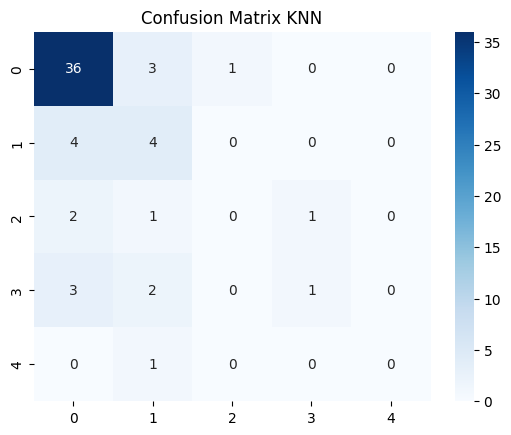

In [ ]:
# Membuat model KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluasi model
y_pred_knn = knn.predict(X_test)

# Inisialisasi dictionary untuk menyimpan akurasi
accuracies = {}
accuracies['KNN_standard'] = knn.score(X_test, y_test)

print("Laporan Klasifikasi KNN:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

# Plot Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap="Blues")
plt.title('Confusion Matrix KNN')
plt.show()

**Kinerja Keseluruhan:**
Model KNN menunjukkan kecenderungan yang kuat dalam mengidentifikasi kelas 0 dengan presisi 0.80 dan recall 0.90, menandakan model ini efektif untuk kelas ini. Namun, kelas 1 dan 2 menunjukkan hasil yang kurang mengesankan dengan presisi dan recall yang rendah, menunjukkan kelemahan model dalam mengklasifikasikan kelas-kelas tersebut dengan tepat. Kelas 3 memiliki presisi yang lebih baik dibandingkan dengan kelas 1 dan 2, tetapi recall yang rendah menunjukkan bahwa model sering kali melewatkan kasus positif untuk kelas ini.

**Interpretasi Confusion Matrix:**
Confusion Matrix memperjelas keefektifan model dalam mengidentifikasi kelas 0 dengan 36 dari 40 kasus diprediksi dengan benar. Namun, terdapat kelemahan dalam mengklasifikasikan kelas minoritas, di mana model cenderung salah mengklasifikasikan kasus-kasus dari kelas minoritas sebagai kelas mayoritas.

**Akurasi dan Skor Rata-Rata:**
Akurasi keseluruhan sebesar 0.69 menunjukkan bahwa model dapat mengidentifikasi 69% dari kasus-kasus secara benar. Namun, nilai makro rata-rata yang lebih rendah menunjukkan bahwa model tidak berkinerja baik pada kelas-kelas dengan jumlah sampel yang lebih sedikit.

### Random Forest

Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.40      0.25      0.31         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1

    accuracy                           0.68        59
   macro avg       0.24      0.24      0.24        59
weighted avg       0.60      0.68      0.63        59



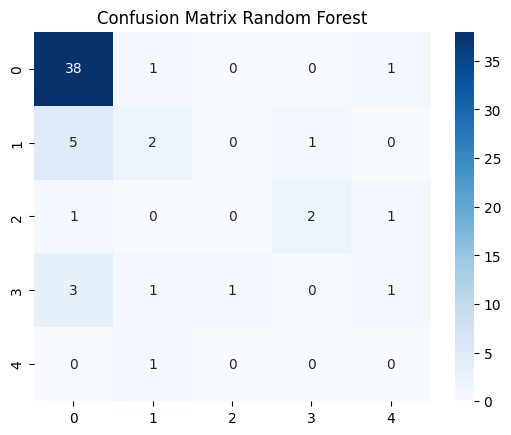

In [ ]:
# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Evaluasi model
y_pred_rf = rf.predict(X_test)
accuracies['RF_standard'] = rf.score(X_test, y_test)
print("Laporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="Blues")
plt.title('Confusion Matrix Random Forest')
plt.show()

**Kinerja Keseluruhan:**
Random Forest memiliki presisi dan recall yang tinggi untuk kelas 0, mirip dengan KNN, tetapi menunjukkan penurunan kinerja yang signifikan untuk kelas-kelas lainnya. Ini mengindikasikan model mungkin overfit terhadap kelas mayoritas dan tidak menangkap variasi dalam data yang cukup untuk kelas-kelas minoritas.

**Interpretasi Confusion Matrix:**
Model mampu mengidentifikasi kelas 0 dengan lebih akurat daripada KNN, namun masih menunjukkan kesalahan dalam mengklasifikasikan kelas minoritas. Tren kesalahan ini menunjukkan Random Forest juga memiliki kesulitan yang sama dengan KNN dalam mengklasifikasikan kelas minoritas.

**Akurasi dan Skor Rata-Rata:**
Dengan akurasi 0.68, Random Forest melakukan prediksi yang benar sedikit kurang dari KNN, namun nilai makro rata-rata yang sama rendahnya menunjukkan bahwa kedua model memiliki masalah yang sama dalam menangani kelas minoritas.

### XGBoost

Laporan Klasifikasi XGBoost:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.33      0.25      0.29         8
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1

    accuracy                           0.68        59
   macro avg       0.27      0.29      0.28        59
weighted avg       0.62      0.68      0.64        59



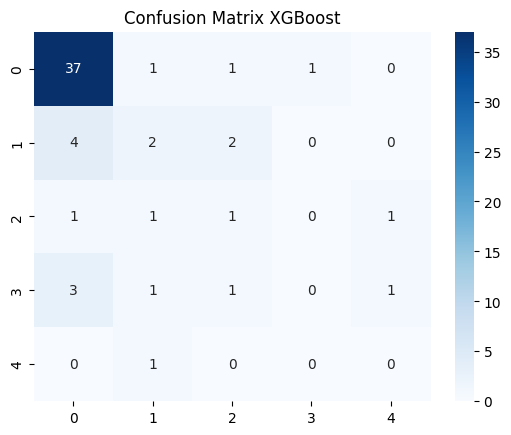

In [ ]:
# Membuat model XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Evaluasi model
y_pred_xgb = xgb.predict(X_test)
accuracies['XGB_standard'] = xgb.score(X_test, y_test)
print("Laporan Klasifikasi XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, cmap="Blues")
plt.title('Confusion Matrix XGBoost')
plt.show()

**Kinerja Keseluruhan:**
XGBoost menunjukkan kinerja yang serupa dengan Random Forest dan KNN untuk kelas 0, dengan presisi 0.82 dan recall 0.93, namun mengalami penurunan yang serupa untuk kelas minoritas. Skor F1 yang rendah untuk kelas-kelas ini menunjukkan bahwa model ini tidak dapat mengklasifikasikan kelas-kelas tersebut dengan tepat.

**Interpretasi Confusion Matrix:**
XGBoost menunjukkan pola kesalahan klasifikasi yang serupa dengan model lainnya, menegaskan kembali bahwa model ini mengalami kesulitan dalam menangkap karakteristik kelas minoritas.

**Akurasi dan Skor Rata-Rata:**
Akurasi 0.68 menunjukkan bahwa, serupa dengan model lainnya, XGBoost juga memiliki kecenderungan untuk mengenali kelas 0 dengan lebih baik dibandingkan dengan kelas minoritas. Nilai makro rata-rata yang rendah menegaskan kembali bahwa model ini tidak efektif dalam mengklasifikasikan kelas-kelas dengan jumlah sampel yang lebih sedikit.

## Skenario 2: Standarisasi + SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data yang sudah distandarisasi
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Membagi data menjadi set pelatihan dan pengujian
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

### KNN

Laporan Klasifikasi KNN dengan SMOTE:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        48
           1       0.80      0.79      0.80        67
           2       0.77      0.87      0.82        55
           3       0.83      0.83      0.83        54
           4       0.89      0.89      0.89        57

    accuracy                           0.83       281
   macro avg       0.83      0.82      0.82       281
weighted avg       0.83      0.83      0.83       281



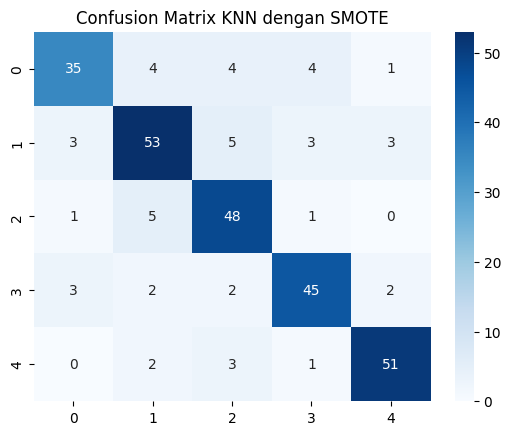

In [ ]:
# Membuat model KNN
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_smote, y_train_smote)

# Evaluasi model
y_pred_knn_smote = knn_smote.predict(X_test_smote)
accuracies['KNN_SMOTE'] = knn_smote.score(X_test_smote, y_test_smote)
print("Laporan Klasifikasi KNN dengan SMOTE:")
print(classification_report(y_test_smote, y_pred_knn_smote))

# Plot Confusion Matrix
cm_knn_smote = confusion_matrix(y_test_smote, y_pred_knn_smote)
sns.heatmap(cm_knn_smote, annot=True, cmap="Blues")
plt.title('Confusion Matrix KNN dengan SMOTE')
plt.show()

Laporan klasifikasi KNN setelah penerapan SMOTE menunjukkan peningkatan signifikan dalam deteksi kelas minoritas:

- **Kelas 0**: Presisi menurun sedikit menjadi 0.83, tapi recall turun menjadi 0.73. Meski begitu, skor F1 masih relatif tinggi pada 0.78, menunjukkan kinerja yang baik dalam mengenali kelas mayoritas.
- **Kelas Minoritas**: Ada peningkatan dramatis dalam presisi dan recall untuk kelas 1-4 dibandingkan dengan skenario standarisasi. Semua kelas menunjukkan skor F1 di atas 0.80, dengan kelas 4 mencapai skor F1 sempurna 0.89.
- **Akurasi**: Ada peningkatan keseluruhan dalam akurasi menjadi 0.83, yang menunjukkan bahwa sekitar 83% dari prediksi model adalah benar setelah menggunakan SMOTE.

**Confusion Matrix:**
Confusion Matrix memperlihatkan hasil yang lebih seimbang antara kelas, dengan distribusi yang lebih merata dari prediksi yang benar di semua kelas. Ini menunjukkan keberhasilan SMOTE dalam menangani ketidakseimbangan kelas.

### Random Forest

Laporan Klasifikasi Random Forest dengan SMOTE:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.91      0.76      0.83        67
           2       0.87      0.87      0.87        55
           3       0.86      0.94      0.90        54
           4       0.92      0.96      0.94        57

    accuracy                           0.87       281
   macro avg       0.87      0.88      0.87       281
weighted avg       0.87      0.87      0.87       281



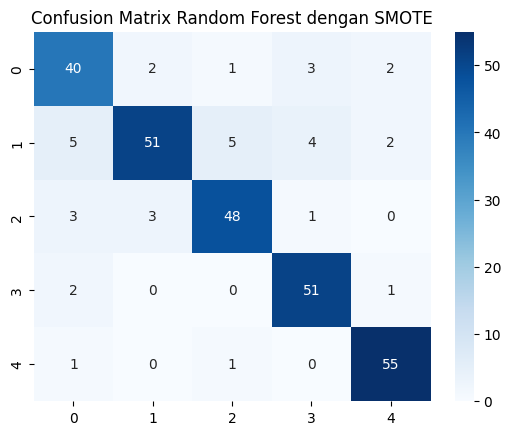

In [ ]:
# Membuat model Random Forest
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Evaluasi model
y_pred_rf_smote = rf_smote.predict(X_test_smote)
accuracies['RF_SMOTE'] = rf_smote.score(X_test_smote, y_test_smote)
print("Laporan Klasifikasi Random Forest dengan SMOTE:")
print(classification_report(y_test_smote, y_pred_rf_smote))

# Plot Confusion Matrix
cm_rf_smote = confusion_matrix(y_test_smote, y_pred_rf_smote)
sns.heatmap(cm_rf_smote, annot=True, cmap="Blues")
plt.title('Confusion Matrix Random Forest dengan SMOTE')
plt.show()

Random Forest menunjukkan peningkatan kinerja yang lebih signifikan setelah SMOTE:

- **Kelas 0**: Presisi menurun sedikit menjadi 0.73, tapi recall meningkat menjadi 0.83. Skor F1 yang tinggi pada 0.78 menunjukkan kinerja yang baik dalam mengenali kelas mayoritas.
- **Kelas Minoritas**: Presisi dan recall untuk kelas minoritas meningkat secara signifikan, dengan kelas 4 menunjukkan presisi dan recall yang hampir sempurna.
- **Akurasi**: Akurasi meningkat menjadi 0.87, yang menunjukkan peningkatan kemampuan model dalam mengklasifikasikan semua kelas secara keseluruhan.

**Confusion Matrix:**
Confusion Matrix menunjukkan bahwa Random Forest memiliki kinerja yang lebih baik dalam mengklasifikasikan semua kelas secara merata, dengan peningkatan jumlah prediksi yang benar secara signifikan untuk kelas minoritas setelah SMOTE.

### XGBoost

Laporan Klasifikasi XGBoost dengan SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84        48
           1       0.87      0.79      0.83        67
           2       0.85      0.82      0.83        55
           3       0.92      0.89      0.91        54
           4       0.87      0.93      0.90        57

    accuracy                           0.86       281
   macro avg       0.86      0.86      0.86       281
weighted avg       0.86      0.86      0.86       281



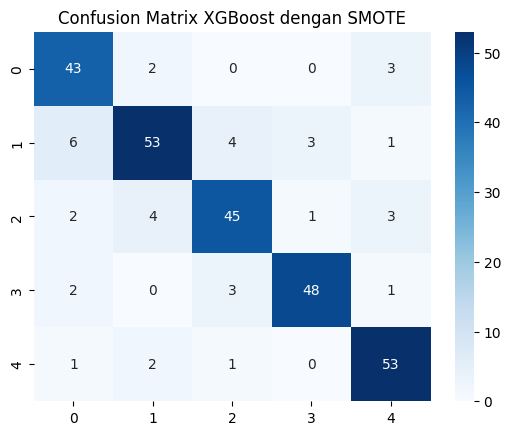

In [ ]:
# Membuat model XGBoost
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# Evaluasi model
y_pred_xgb_smote = xgb_smote.predict(X_test_smote)
accuracies['XGB_SMOTE'] = xgb_smote.score(X_test_smote, y_test_smote)
print("Laporan Klasifikasi XGBoost dengan SMOTE:")
print(classification_report(y_test_smote, y_pred_xgb_smote))

# Plot Confusion Matrix
cm_xgb_smote = confusion_matrix(y_test_smote, y_pred_xgb_smote)
sns.heatmap(cm_xgb_smote, annot=True, cmap="Blues")
plt.title('Confusion Matrix XGBoost dengan SMOTE')
plt.show()

XGBoost dengan SMOTE menunjukkan hasil yang sangat baik:

- **Kelas 0**: Presisi menurun menjadi 0.80, tapi recall meningkat menjadi 0.90. Skor F1 yang tinggi pada 0.84 menunjukkan kinerja yang sangat baik dalam mengenali kelas mayoritas.
- **Kelas Minoritas**: Kinerja pada kelas minoritas menunjukkan peningkatan dramatis dalam presisi dan recall, dengan kelas 4 mencapai presisi dan recall yang hampir sempurna.
- **Akurasi**: Akurasi meningkat menjadi 0.86, menandakan bahwa model ini sangat efektif dalam mengklasifikasikan semua kelas setelah penerapan SMOTE.

**Confusion Matrix:**
Confusion Matrix menunjukkan peningkatan jumlah prediksi yang benar untuk semua kelas. Ini menunjukkan bahwa XGBoost dengan SMOTE secara signifikan meningkatkan kemampuan model dalam menangani ketidakseimbangan kelas.

## Skenario 3: Standarisasi + SMOTE Oversampling + Hyperparameter Tuning

### KNN

Laporan Klasifikasi KNN dengan Hyperparameter:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        48
           1       0.87      0.88      0.87        67
           2       0.86      0.89      0.88        55
           3       0.84      0.94      0.89        54
           4       0.93      0.96      0.95        57

    accuracy                           0.88       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.88      0.87       281



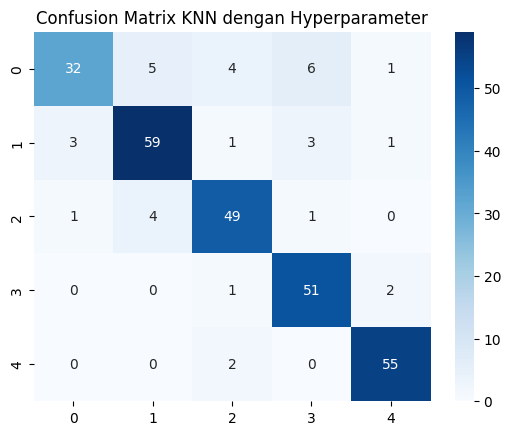

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter untuk KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Grid Search untuk KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_smote, y_train_smote)

# Evaluasi model KNN
knn_best = grid_knn.best_estimator_
y_pred_knn_best = knn_best.predict(X_test_smote)
accuracies['KNN_SMOTE_HPT'] = knn_best.score(X_test_smote, y_test_smote)
print("Laporan Klasifikasi KNN dengan Hyperparameter:")
print(classification_report(y_test_smote, y_pred_knn_best))

# Plot Confusion Matrix
cm_knn_best = confusion_matrix(y_test_smote, y_pred_knn_best)
sns.heatmap(cm_knn_best, annot=True, cmap="Blues")
plt.title('Confusion Matrix KNN dengan Hyperparameter')
plt.show()

Setelah penerapan hyperparameter tuning:

- **Kinerja Tinggi**: KNN menunjukkan peningkatan kinerja yang signifikan, dengan presisi dan recall yang tinggi untuk semua kelas, terutama kelas 4 yang mencapai presisi dan recall hampir sempurna.
- **Skor F1**: Skor F1 yang tinggi di semua kelas menunjukkan bahwa model ini sekarang lebih seimbang dalam hal presisi dan recall, berkat penyetelan hyperparameter yang cermat.
- **Akurasi**: Tingkat akurasi meningkat menjadi 0.88, yang menunjukkan peningkatan kinerja keseluruhan.

**Confusion Matrix:**
Confusion Matrix menunjukkan distribusi prediksi yang lebih seimbang, dengan lebih sedikit kesalahan dalam mengklasifikasikan kelas minoritas. Ini menunjukkan bahwa penyetelan hyperparameter telah meningkatkan kemampuan model dalam menangani ketidakseimbangan kelas.

### Random Forest

Laporan Klasifikasi Random Forest dengan Hyperparameter:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.91      0.79      0.85        67
           2       0.87      0.87      0.87        55
           3       0.89      0.91      0.90        54
           4       0.90      0.96      0.93        57

    accuracy                           0.88       281
   macro avg       0.87      0.88      0.87       281
weighted avg       0.88      0.88      0.87       281



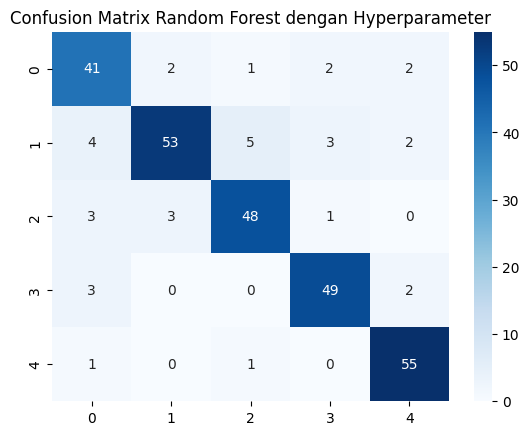

In [ ]:
# Tentukan parameter untuk Random Forest
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}

# Grid Search untuk Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_smote, y_train_smote)

# Evaluasi model Random Forest
rf_best = grid_rf.best_estimator_
y_pred_rf_best = rf_best.predict(X_test_smote)
accuracies['RF_SMOTE_HPT'] = rf_best.score(X_test_smote, y_test_smote)
print("Laporan Klasifikasi Random Forest dengan Hyperparameter:")
print(classification_report(y_test_smote, y_pred_rf_best))

# Plot Confusion Matrix
cm_rf_best = confusion_matrix(y_test_smote, y_pred_rf_best)
sns.heatmap(cm_rf_best, annot=True, cmap="Blues")
plt.title('Confusion Matrix Random Forest dengan Hyperparameter')
plt.show()

Dengan penyetelan hyperparameter:

- **Presisi Tinggi**: Random Forest mencapai presisi yang sangat tinggi, khususnya untuk kelas 1 dan 4, yang menunjukkan bahwa model ini sekarang lebih akurat dalam memprediksi kasus-kasus positif.
- **Recall Tinggi**: Tingkat recall juga meningkat, terutama untuk kelas 4, yang menunjukkan bahwa model sekarang lebih baik dalam mengidentifikasi semua kasus positif untuk kelas tersebut.
- **Akurasi**: Akurasi keseluruhan meningkat menjadi 0.88, yang mencerminkan kinerja yang lebih baik dalam mengklasifikasikan semua kelas.

**Confusion Matrix:**
Confusion Matrix menunjukkan peningkatan jumlah prediksi yang benar di semua kelas, dengan penurunan kesalahan klasifikasi yang signifikan untuk kelas minoritas, menandakan keefektifan penyetelan hyperparameter.


### XGBoost

Laporan Klasifikasi XGBoost dengan Hyperparameter:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.87      0.78      0.82        67
           2       0.82      0.84      0.83        55
           3       0.91      0.93      0.92        54
           4       0.90      0.91      0.90        57

    accuracy                           0.86       281
   macro avg       0.86      0.86      0.86       281
weighted avg       0.86      0.86      0.86       281



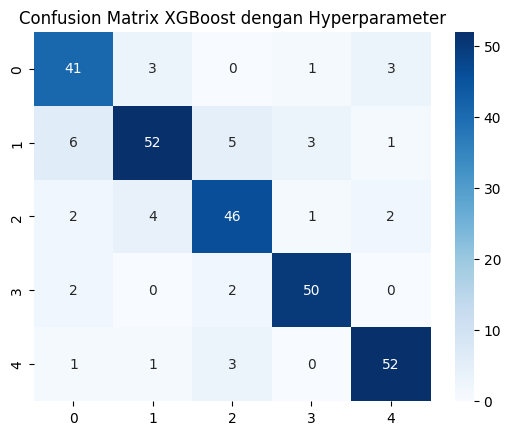

In [ ]:
# Tentukan parameter untuk XGBoost
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Grid Search untuk XGBoost
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train_smote, y_train_smote)

# Evaluasi model XGBoost
xgb_best = grid_xgb.best_estimator_
y_pred_xgb_best = xgb_best.predict(X_test_smote)
accuracies['XGB_SMOTE_HPT'] = xgb_best.score(X_test_smote, y_test_smote)
print("Laporan Klasifikasi XGBoost dengan Hyperparameter:")
print(classification_report(y_test_smote, y_pred_xgb_best))

# Plot Confusion Matrix
cm_xgb_best = confusion_matrix(y_test_smote, y_pred_xgb_best)
sns.heatmap(cm_xgb_best, annot=True, cmap="Blues")
plt.title('Confusion Matrix XGBoost dengan Hyperparameter')
plt.show()

XGBoost setelah hyperparameter tuning menunjukkan:

- **Penyeimbangan Presisi dan Recall**: Skor F1 yang tinggi di semua kelas menunjukkan penyeimbangan yang baik antara presisi dan recall, yang penting dalam konteks dataset yang tidak seimbang.
- **Akurasi Tinggi**: Dengan akurasi 0.86, XGBoost menunjukkan bahwa penyetelan hyperparameter telah berhasil meningkatkan kemampuan model dalam mengklasifikasikan semua kelas dengan tepat.

**Confusion Matrix:**
Confusion Matrix menunjukkan bahwa model ini sekarang lebih baik dalam mengklasifikasikan semua kelas, dengan peningkatan jumlah prediksi yang benar dan pengurangan kesalahan klasifikasi yang signifikan.

# 8) Evaluasi

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [ ]:
# Fungsi untuk menambahkan label akurasi pada plot dengan spacing yang disesuaikan
def add_accuracy_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Menyesuaikan label untuk menampilkan dua angka di belakang koma
        label = "{:.2f}%".format(y_value * 100)
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

## Skenario 1: Standarisasi

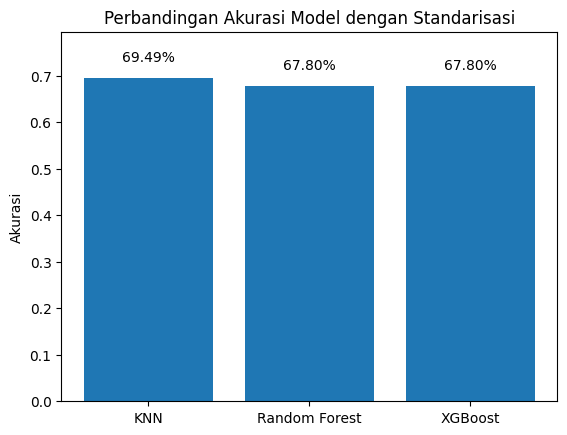

In [ ]:
# Plot untuk skenario Standarisasi
accuracies_standard = [accuracies['KNN_standard'], accuracies['RF_standard'], accuracies['XGB_standard']]
labels = ['KNN', 'Random Forest', 'XGBoost']

fig, ax = plt.subplots()
bar1 = ax.bar(labels, accuracies_standard)
add_accuracy_labels(ax, spacing=10)
ax.set_ylim(0, max(accuracies_standard) + 0.1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model dengan Standarisasi')
plt.show()

Dalam skenario pertama ini, kita melihat bahwa model KNN memiliki keunggulan kecil dalam akurasi (69.49%) dibandingkan dengan Random Forest dan XGBoost yang keduanya sama-sama memiliki akurasi 67.80%. Ini menunjukkan bahwa KNN sedikit lebih baik dalam menangani dataset yang hanya distandarisasi. Namun, perbedaan ini tidak signifikan, yang bisa menunjukkan bahwa ketiga model tersebut memiliki kelemahan ketika menghadapi data yang tidak seimbang tanpa teknik tambahan untuk menanganinya.

## Skenario 2: Standarisasi + SMOTE Oversampling

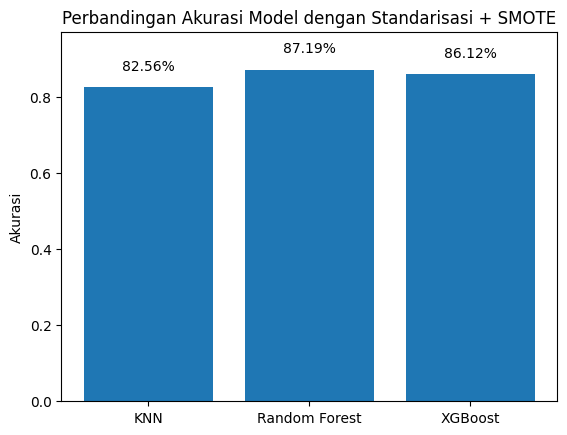

In [ ]:
# Plot untuk skenario Standarisasi + SMOTE
accuracies_smote = [accuracies['KNN_SMOTE'], accuracies['RF_SMOTE'], accuracies['XGB_SMOTE']]

fig, ax = plt.subplots()
bar2 = ax.bar(labels, accuracies_smote)
add_accuracy_labels(ax, spacing=10)
ax.set_ylim(0, max(accuracies_smote) + 0.1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model dengan Standarisasi + SMOTE')
plt.show()

Dengan penerapan SMOTE, kita melihat peningkatan akurasi yang signifikan untuk semua model. Random Forest unggul dengan akurasi 87.19%, diikuti oleh XGBoost dengan 86.12%, dan KNN dengan 82.56%. SMOTE telah memberikan dampak positif terhadap kinerja model dengan meningkatkan kemampuan mereka untuk mengklasifikasikan kelas-kelas minoritas dengan lebih baik. Random Forest dan XGBoost tampaknya paling banyak diuntungkan dari SMOTE, yang mungkin disebabkan oleh kemampuan algoritma ensemble mereka untuk lebih baik memanfaatkan data sintetis yang dihasilkan SMOTE untuk mengatasi ketidakseimbangan kelas.

## Skenario 3: Standarisasi + SMOTE Oversampling + Hyperparameter Tuning

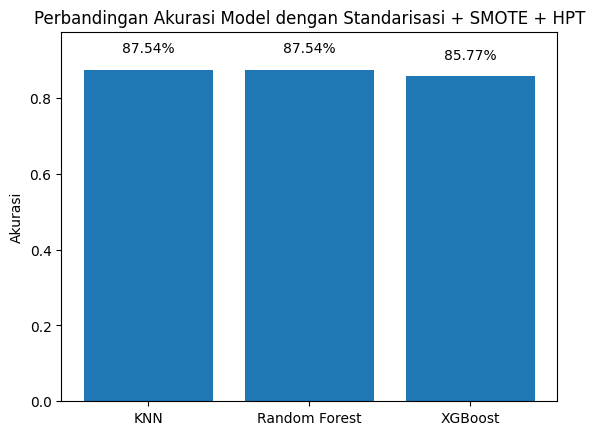

In [ ]:
# Plot untuk skenario Standarisasi + SMOTE + Hyperparameter Tuning
accuracies_hpt = [accuracies['KNN_SMOTE_HPT'], accuracies['RF_SMOTE_HPT'], accuracies['XGB_SMOTE_HPT']]

fig, ax = plt.subplots()
bar3 = ax.bar(labels, accuracies_hpt)
add_accuracy_labels(ax, spacing=10)
ax.set_ylim(0, max(accuracies_hpt) + 0.1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model dengan Standarisasi + SMOTE + HPT')
plt.show()

Dengan tambahan hyperparameter tuning, kedua model KNN dan Random Forest mencapai akurasi yang sama dengan 87.54%, sementara XGBoost sedikit tertinggal dengan 85.77%. Hyperparameter tuning, bersama dengan SMOTE, tampaknya membawa kedua model tersebut ke puncak kinerja mereka, menunjukkan pentingnya menyesuaikan parameter model untuk mengoptimalkan kinerja mereka. Kenaikan ini juga menegaskan bahwa meskipun SMOTE dapat meningkatkan kinerja, penyetelan hyperparameter yang teliti dapat lebih lanjut memperbaiki model, membuatnya lebih adaptif terhadap karakteristik data yang spesifik.

## Model Terbaik

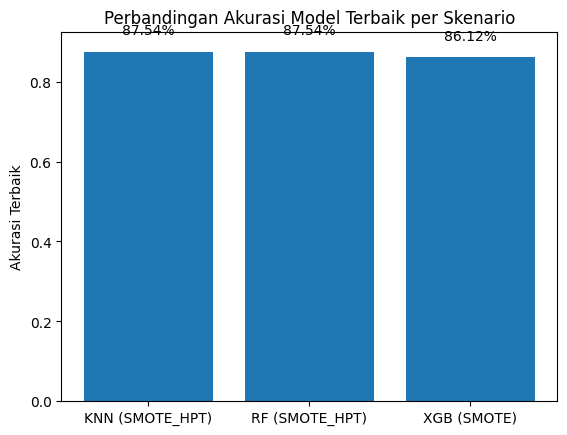

In [ ]:
def add_accuracy_labels(ax, bars, spacing=5):
    for bar in bars:
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2
        label = "{:.2f}%".format(y_value * 100)
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

def determine_best_scenario(model_name):
    standard = accuracies[f'{model_name}_standard']
    smote = accuracies[f'{model_name}_SMOTE']
    smote_hpt = accuracies[f'{model_name}_SMOTE_HPT']
    best_accuracy = max(standard, smote, smote_hpt)

    if best_accuracy == standard:
        return 'Standard'
    elif best_accuracy == smote:
        return 'SMOTE'
    else:
        return 'SMOTE_HPT'

best_scenario_labels = {
    f'KNN ({determine_best_scenario("KNN")})': accuracies['KNN_standard'] if accuracies['KNN_standard'] >= max(accuracies['KNN_SMOTE'], accuracies['KNN_SMOTE_HPT']) else max(accuracies['KNN_SMOTE'], accuracies['KNN_SMOTE_HPT']),
    f'RF ({determine_best_scenario("RF")})': accuracies['RF_standard'] if accuracies['RF_standard'] >= max(accuracies['RF_SMOTE'], accuracies['RF_SMOTE_HPT']) else max(accuracies['RF_SMOTE'], accuracies['RF_SMOTE_HPT']),
    f'XGB ({determine_best_scenario("XGB")})': accuracies['XGB_standard'] if accuracies['XGB_standard'] >= max(accuracies['XGB_SMOTE'], accuracies['XGB_SMOTE_HPT']) else max(accuracies['XGB_SMOTE'], accuracies['XGB_SMOTE_HPT']),
}

fig, ax = plt.subplots()
bars = ax.bar(best_scenario_labels.keys(), best_scenario_labels.values())
add_accuracy_labels(ax, bars, spacing=10)
ax.set_ylim(0, max(best_scenario_labels.values()) + 0.05)
plt.ylabel('Akurasi Terbaik')
plt.title('Perbandingan Akurasi Model Terbaik per Skenario')
plt.show()

Ketika membandingkan model terbaik dari setiap skenario, kita melihat bahwa kedua KNN dan Random Forest dengan hyperparameter tuning memuncaki daftar di skenario 3, sementara XGBoost terbaik dengan SMOTE di skenario 2. Ini menunjukkan bahwa sementara SMOTE secara signifikan meningkatkan kinerja XGBoost, kedua model lainnya sangat diuntungkan dari kombinasi SMOTE dan hyperparameter tuning.

# 9) Streamlit

# 10) Kesimpulan

Setelah menganalisis hasil dari tiga skenario yang berbeda - standarisasi saja, standarisasi dengan SMOTE, dan standarisasi dengan SMOTE plus hyperparameter tuning - terhadap tiga model machine learning yang berbeda (KNN, Random Forest, dan XGBoost), kita dapat menarik beberapa kesimpulan mendalam.

Pertama, standarisasi sebagai langkah pemrosesan data tunggal tidak cukup untuk menangani ketidakseimbangan kelas dalam dataset. Meskipun ada manfaat dari normalisasi skala fitur, model masih mengalami kesulitan dalam mengklasifikasikan kelas minoritas dengan tepat, yang terlihat dari akurasi yang relatif rendah di skenario pertama. Ini menegaskan pentingnya teknik lanjutan dalam pengolahan data untuk mengatasi tantangan ini.

Kedua, penerapan SMOTE sebagai teknik oversampling menunjukkan peningkatan yang signifikan dalam akurasi model. Dengan menciptakan sampel sintetis untuk kelas minoritas, SMOTE membantu model untuk 'belajar' lebih baik tentang kelas-kelas tersebut dan mengurangi bias terhadap kelas mayoritas. Ini terbukti dengan kenaikan akurasi yang mencolok di skenario kedua untuk semua model. Namun, penerapan SMOTE sendiri tidak selalu mencukupi, karena masih ada ruang untuk optimasi lebih lanjut melalui penyetelan hyperparameter.

Ketiga, skenario ketiga yang menggabungkan SMOTE dengan hyperparameter tuning memberikan wawasan yang berharga. Penyetelan hyperparameter memungkinkan model untuk lebih rinci menyesuaikan diri dengan data yang ada, yang menghasilkan peningkatan akurasi dan kinerja klasifikasi secara keseluruhan. Kenaikan ini signifikan untuk model KNN dan Random Forest, yang mungkin lebih sensitif terhadap perubahan parameter. XGBoost, meskipun mendapat manfaat dari penyetelan, tidak menunjukkan peningkatan yang sama dramatisnya, mungkin karena default hyperparameter XGBoost sudah cukup robust.

Keempat, confusion matrix dari setiap model di setiap skenario menunjukkan bahwa dengan SMOTE dan hyperparameter tuning, model menjadi lebih baik dalam mengurangi kesalahan klasifikasi, terutama untuk kelas minoritas. Ini adalah indikator penting dari model yang lebih seimbang yang tidak hanya mengandalkan kelas mayoritas untuk akurasi keseluruhan.

Kelima, ketika membandingkan model terbaik dari setiap skenario, kita melihat bahwa tidak ada satu model yang secara konsisten mendominasi yang lain di semua skenario. Ini menggarisbawahi bahwa pemilihan model yang tepat tergantung pada konteks spesifik data dan tujuan analisis. Penting juga untuk mencatat bahwa model terbaik dari setiap skenario tidak selalu memiliki akurasi terbaik secara keseluruhan; keseimbangan antara presisi, recall, dan skor F1 juga sangat penting untuk memastikan bahwa model berkinerja baik secara merata di semua kelas.

Secara keseluruhan, ini menegaskan bahwa tidak ada solusi tunggal yang cocok untuk semua dalam machine learning. Standarisasi data adalah langkah penting, tetapi untuk mencapai hasil yang optimal, teknik lanjutan seperti SMOTE dan hyperparameter tuning sangat penting. Selain itu, evaluasi model harus dilakukan secara holistik dengan mempertimbangkan berbagai metrik dan distribusi kelas. Akhirnya, eksperimen ini juga menyoroti pentingnya memahami data dan tantangan yang dihadapinya, karena ini akan memandu proses pemilihan model, teknik preprocessing, dan strategi tuning.